In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [86]:
## Data is here : https://github.com/laxmimerit/All-CSV-ML-Data-Files-Download

In [8]:
df = pd.read_csv('./sample_data/spam.tsv', sep='\t')
display(df.shape)
df.head()

(5572, 4)

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


<AxesSubplot:>

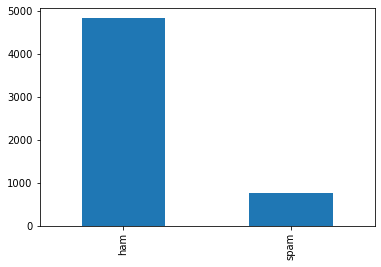

In [5]:
df['label'].value_counts().plot(kind='bar')

In [6]:
df['label'].value_counts(normalize=True)

ham     0.865937
spam    0.134063
Name: label, dtype: float64

In [7]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [9]:
df[df['label']=='spam'].head(10)

,label,message,length,punct
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,8
12,spam,URGENT! You have won a 1 week FREE membership ...,155,8
15,spam,"XXXMobileMovieClub: To use your credit, click ...",149,11
19,spam,England v Macedonia - dont miss the goals/team...,155,8
34,spam,Thanks for your subscription to Ringtone UK yo...,158,2
42,spam,07732584351 - Rodger Burns - MSG = We tried to...,172,5


### Exploratory Data Analysis

<AxesSubplot:xlabel='length', ylabel='Count'>

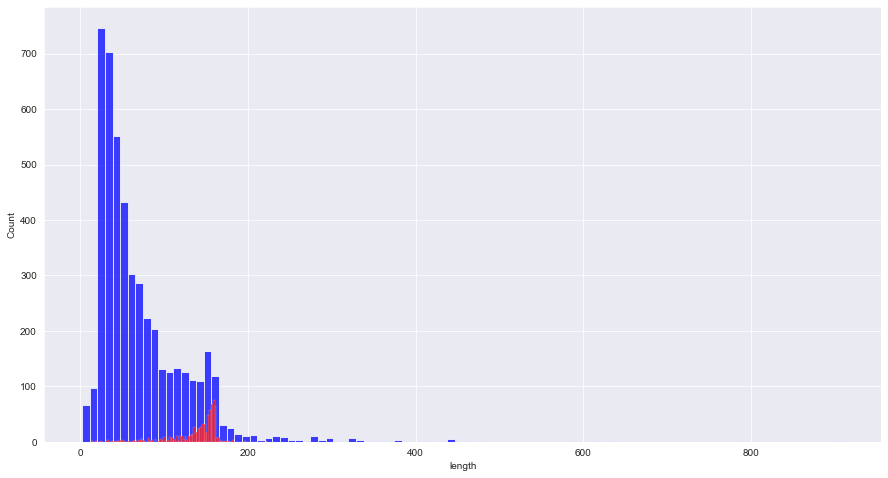

In [30]:
plt.figure(figsize=(15, 8))
sns.histplot(df[df.label=='ham']['length'], bins=100, color='blue')
sns.histplot(df[df.label=='spam']['length'], bins=100, color='red')

<AxesSubplot:xlabel='punct', ylabel='Count'>

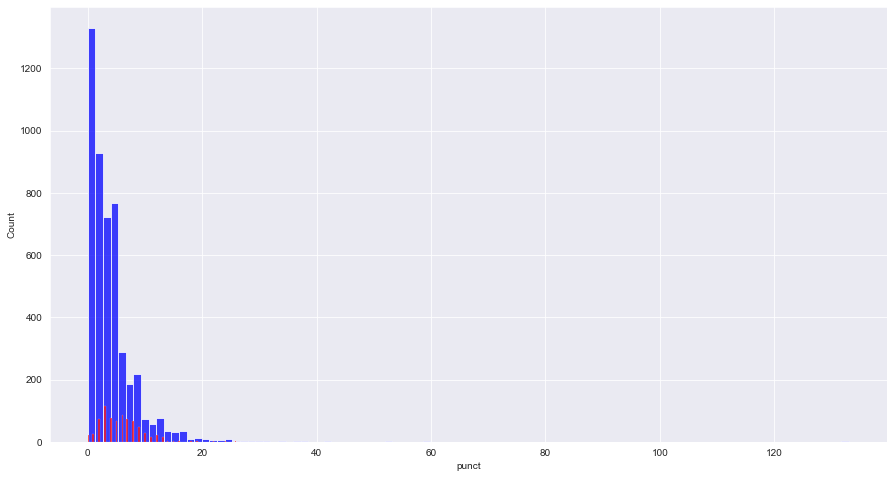

In [31]:
plt.figure(figsize=(15, 8))
sns.histplot(df[df.label=='ham']['punct'], bins=100, color='blue')
sns.histplot(df[df.label=='spam']['punct'], bins=100, color='red')

### Data Preparation

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

In [64]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [65]:
X_train, X_test, y_train, y_test = train_test_split(
                                                        df['message'], 
                                                        df['label'], 
                                                        test_size=0.3, 
                                                        random_state=42, 
                                                        shuffle=True,
                                                        stratify=df['label']
                                                    )

In [66]:
### Bag of Word Creation

In [67]:
# vectorizer = TfidfVectorizer()
# X_train = vectorizer.fit_transform(X_train)

In [68]:
# X_train.shape

### Pipeline and RF

In [69]:
clf = Pipeline(
                [
                    ('tfidf', TfidfVectorizer()),
                    ('clf', RandomForestClassifier(n_estimators=100, n_jobs=-1))
                ]
            )

In [71]:
clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', RandomForestClassifier(n_jobs=-1))])

In [74]:
y_pred = clf.predict(X_test)

In [75]:
confusion_matrix(y_test, y_pred)

array([[1448,    0],
       [  38,  186]], dtype=int64)

In [77]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.99      1448
        spam       1.00      0.83      0.91       224

    accuracy                           0.98      1672
   macro avg       0.99      0.92      0.95      1672
weighted avg       0.98      0.98      0.98      1672



In [79]:
clf.predict(['Hi, This is Jagan'])

array(['ham'], dtype=object)

In [85]:
clf.predict(['WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only'])

array(['spam'], dtype=object)